In [59]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
df_raw = pd.read_csv('/content/car_price_prediction (1).csv', header=0)
df_raw

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [61]:
df_raw['Category'].value_counts()

,count
Category,
Sedan,8736
Jeep,5473
Hatchback,2847
Minivan,647
Coupe,532
Universal,364
Microbus,306
Goods wagon,233
Pickup,52


In [62]:
df_raw.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [63]:
df_raw.isna().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [64]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [65]:
def contador_de_datos(df, columnas, titles=None, max_cols=2):
    n = len(columnas)
    rows = (n + max_cols - 1) // max_cols

    plt.figure(figsize=(5 * max_cols, 4 * rows))

    for i, col in enumerate(columnas):
        plt.subplot(rows, max_cols, i + 1)
        sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
        plt.title(titles[i] if titles else col)
        plt.xticks(rotation=45)
        plt.xlabel("")
        plt.ylabel("Count")

    plt.tight_layout()
    plt.suptitle("Distributions of Applicants", fontsize=16, y=1.02)
    plt.show()

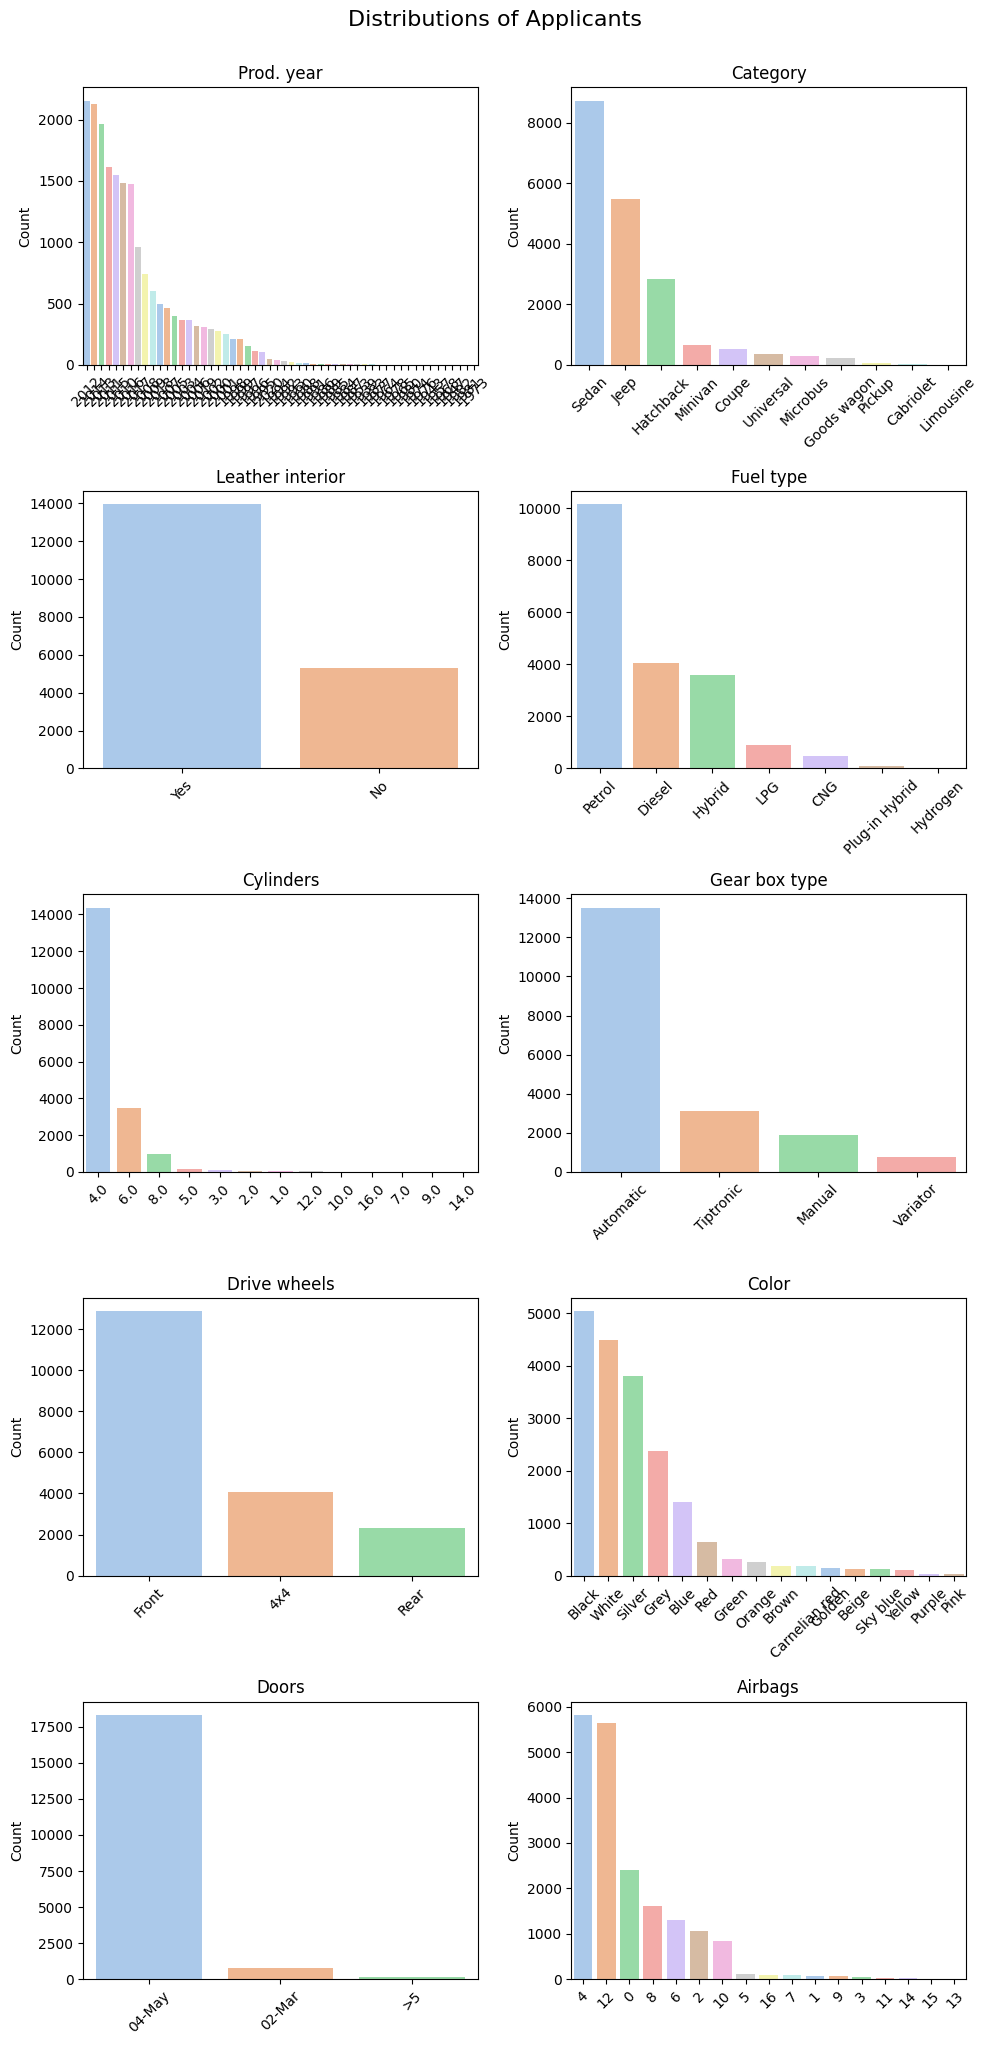

In [66]:
columnas=['Prod. year','Category','Leather interior','Fuel type','Cylinders','Gear box type','Drive wheels','Color','Doors','Airbags']
contador_de_datos(df_raw, columnas)

In [67]:
df_raw.drop(columns=['ID'],inplace=True)

In [68]:
df_raw['Levy'] = df_raw['Levy'].astype(str)
df_raw['Levy']=df_raw['Levy'].str.replace('-','0')

In [69]:
df_raw['Levy']=df_raw['Levy'].astype(float)

In [70]:
df_raw.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [71]:
df_raw['Mileage'] = df_raw['Mileage'].astype(str)
df_raw['Mileage'] = df_raw['Mileage'].str.replace(' km','')

In [72]:
df_raw['Mileage'] = df_raw['Mileage'].astype(float)

In [73]:
df_raw['Doors'] = df_raw['Doors'].str.extract(r'(\d+)').astype(int)

In [74]:
df_raw

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4


In [75]:
df_raw['Turbo_status'] = np.where(df_raw['Engine volume'].str.contains('Turbo', case=False, na=False), 'Turbo', 'No turbo')
df_raw['Engine volume'] = df_raw['Engine volume'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [76]:
df_raw

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,Turbo
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,No turbo
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,No turbo
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,No turbo


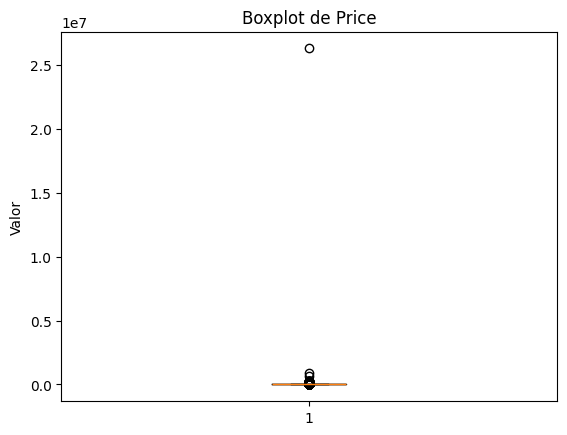

In [77]:
plt.boxplot(df_raw['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Valor')
plt.show()

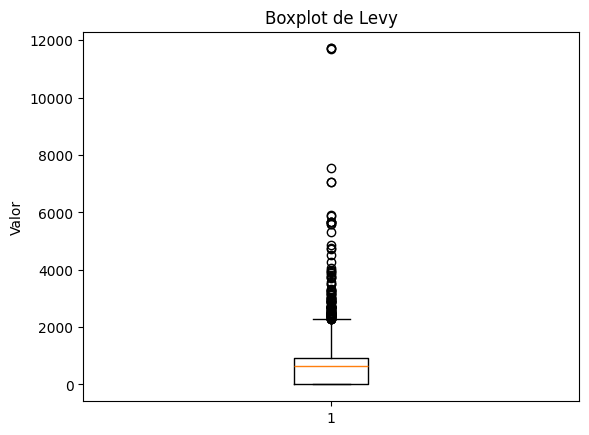

In [78]:
plt.boxplot(df_raw['Levy'])
plt.title('Boxplot de Levy')
plt.ylabel('Valor')
plt.show()

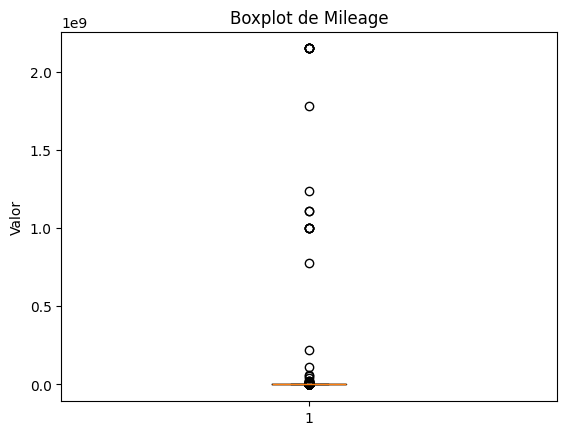

In [79]:
plt.boxplot(df_raw['Mileage'])
plt.title('Boxplot de Mileage')
plt.ylabel('Valor')
plt.show()

In [80]:
def quitar_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR

    df_filtrado = df[(df[variable] >= limite_inferior) & (df[variable] <= limite_superior)]

    return df_filtrado

In [81]:
def quitar_outliers_std(df, variable):
    mean_val = df[variable].mean()
    std_dev = df[variable].std()

    # Define bounds for outliers (e.g., 3 standard deviations from the mean)
    limite_inferior = mean_val - 3 * std_dev
    limite_superior = mean_val + 3 * std_dev

    df_filtrado = df[(df[variable] >= limite_inferior) & (df[variable] <= limite_superior)]

    return df_filtrado

In [82]:
# Apply the new outlier removal function to df_raw
df_raw_std_filtered = df_raw.copy()
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Price')
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Levy')
df_raw_std_filtered = quitar_outliers_std(df_raw_std_filtered, 'Mileage')

print(f"Original DataFrame shape: {df_raw.shape}")
print(f"Filtered DataFrame shape (mean/std method): {df_raw_std_filtered.shape}")
display(df_raw_std_filtered.head())

Original DataFrame shape: (19237, 18)
Filtered DataFrame shape (mean/std method): (19061, 18)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo


In [83]:
quitar_outliers(df_raw, 'Price')
quitar_outliers(df_raw, 'Levy')
quitar_outliers(df_raw, 'Mileage')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo_status
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,No turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,No turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,No turbo
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,No turbo
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,No turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,2,Left wheel,Silver,5,Turbo
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4,Left wheel,Red,8,No turbo
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4,Left wheel,Grey,4,No turbo
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,4,Left wheel,Black,4,No turbo


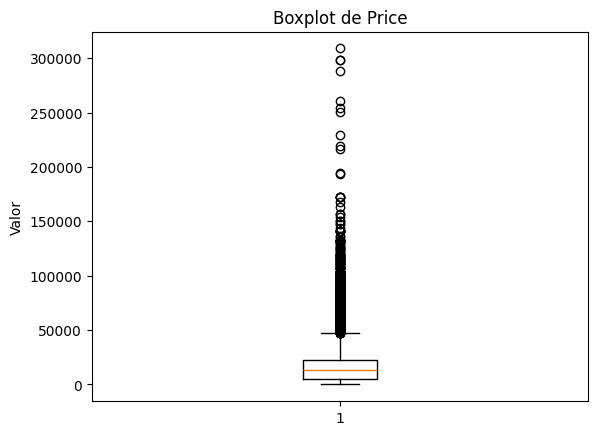

In [84]:
plt.boxplot(df_raw_std_filtered['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Valor')
plt.show()

In [85]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_raw_std_filtered[['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status']])
encoded_cols = encoder.get_feature_names_out(['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status'])
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=df_raw_std_filtered.index)

In [86]:
df = pd.concat([df_raw_std_filtered.drop(columns=['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color','Turbo_status']), X_encoded], axis=1)

In [87]:
df

,Price,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_status_Turbo
0,13328,1399.0,3.5,186005.0,6.0,4,12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16621,1018.0,3.0,192000.0,6.0,4,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.0,1.3,200000.0,4.0,4,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862.0,2.5,168966.0,4.0,4,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11726,446.0,1.3,91901.0,4.0,4,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,2.0,300000.0,4.0,2,5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19233,15681,831.0,2.4,161600.0,4.0,4,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19234,26108,836.0,2.0,116365.0,4.0,4,4,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,5331,1288.0,2.0,51258.0,4.0,4,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='Price')
y = df['Price']
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

In [89]:
y_scaler = StandardScaler()
y_nor = y_scaler.fit_transform(y.values.reshape(-1,1))

In [90]:
X_final = pd.DataFrame(X_nor, columns = X.columns)
y_final = pd.DataFrame(y_nor, columns = ['Price'])

In [91]:
X_final

,Levy,Engine volume,Mileage,Cylinders,Doors,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Turbo_status_Turbo
0,1.572763,1.462990,0.017213,1.235057,0.182696,1.257510,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,-0.335360
1,0.811285,0.859636,0.022623,1.235057,0.182696,0.329417,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
2,-1.223321,-1.191767,0.029843,-0.479915,0.182696,-1.062723,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
3,0.499499,0.256282,0.001836,-0.479915,0.182696,-1.526770,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,1.818405,-0.074781,-0.335360
4,-0.331931,-1.191767,-0.067711,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,-0.335360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19056,-1.223321,-0.347072,0.120088,-0.479915,-4.795674,-0.366653,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,2.013278,-0.08026,-0.549932,-0.074781,2.981869
19057,0.437541,0.135611,-0.004811,-0.479915,0.182696,0.329417,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,5.399982,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
19058,0.447534,-0.347072,-0.045633,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,2.656994,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360
19059,1.350915,-0.347072,-0.104389,-0.479915,0.182696,-0.598676,-0.014488,-0.007243,-0.116214,-0.007243,...,-0.376365,-0.115749,-0.036958,-0.04528,-0.185186,-0.496702,-0.08026,-0.549932,-0.074781,-0.335360


In [92]:
y_final

,Price
0,-0.209888
1,-0.029187
2,-0.476631
3,-0.743320
4,-0.297796
...,...
19056,-0.476631
19057,-0.080769
19058,0.491404
19059,-0.648717


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [94]:
regresion_multi_var = linear_model.LinearRegression()
regresion_multi_var.fit(X_train,y_train)

LinearRegression()

In [95]:
r2 = regresion_multi_var.score(X_test,y_test)
print('coeficiente de indeterminación R2: {r2}'.format(r2 = r2))

coeficiente de indeterminación R2: 0.37295182556197215


In [96]:
from sklearn.metrics import mean_squared_error
y_pred = regresion_multi_var.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.737316984824424
